<a href="https://colab.research.google.com/github/ramansbach/astrophysics_notebooks/blob/main/WeekFive_Nucleosynthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

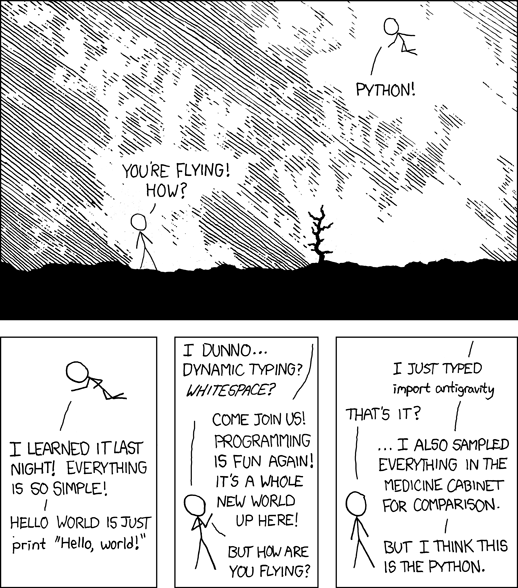

In [ ]:
! pip install mendeleev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.4/367.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 29.9 MB/s eta 0:00:00


In [ ]:
###define global variable(s)
c = 3 * 10**8 #speed of light
kgToAmu = 1.660539e-27
m_protonkg = 1.672621911e-27
m_neutronkg = 1.674927485e-27
m_proton = m_protonkg / kgToAmu
m_neutron = m_neutronkg / kgToAmu
JtoeV = 1.602177e-19

In [ ]:
#function first
def fusion_energy(m1,m2,ninit):
  """
  ----------
  Parameters
  ----------
  m1 : float
    mass of original nucleus, amu
  m2 : float
    mass of fused nucleus, amu
  ninit : int
    number of particles initially
  """
  deltaMamu = m1*ninit - m2
  eps = deltaMamu / (m1*ninit) #efficiency
  deltaM = deltaMamu*kgToAmu
  E = deltaM * c * c #energy released, Joules
  Eev = E / JtoeV
  return (eps,E,Eev)

In [ ]:
from mendeleev import H, He
eps,E,EeV = fusion_energy(H.mass,He.mass,4)
print("efficiency is {}".format(eps))
print("Energy is {0} J ({1} eV)".format(E,EeV))

efficiency is 0.007291170634920533
Energy is 4.393487296979938e-12 J (27421984.568371274 eV)


Thus, the efficiency is indeed about 0.72 %, and the energy produced from hydrogen burning is $4.3 \times 10^{-12} J$ or 27 MeV.

In [ ]:
from mendeleev import element

In [ ]:
iron = element('Fe')
print("The number of protons in iron is {0} and the number of neutrons is {1}".format(iron.atomic_number,
                                                                                      iron.mass_number-iron.atomic_number))


The number of protons in iron is 26 and the number of neutrons is 30


In [ ]:
def binding_energy(Z,A,mass):
  """
  Parameters
  -----------
  Z : int
    number of protons
  A : int
    number of particles in the nucleus/mass number
  mass : float
    mass of the nucleus in atomic mass units
  """
  bE = (Z*m_protonkg + (A-Z)*m_neutronkg - mass*kgToAmu)*c*c
  return bE

In [ ]:
H = element('H')
H.isotopes

[<Isotope(Z=1, A=1, mass=1.00782503190(1), abundance=99.986(8))>,
 <Isotope(Z=1, A=2, mass=2.01410177784(2), abundance=0.015(8))>,
 <Isotope(Z=1, A=3, mass=3.01604928132(8), abundance=None)>,
 <Isotope(Z=1, A=4, mass=4.0264(1), abundance=None)>,
 <Isotope(Z=1, A=5, mass=5.03531(10), abundance=None)>,
 <Isotope(Z=1, A=6, mass=6.0450(3), abundance=None)>,
 <Isotope(Z=1, A=7, mass=7.053(1), abundance=None)>]

In [ ]:
H = element('H')
D = H.isotopes[1]
DbE = binding_energy(D.atomic_number,D.mass_number,D.mass)

In [ ]:
DbE

2.749359528632139e-13

In [ ]:
DbE/JtoeV/(1e6)/D.mass_number

0.8580074263430754

In [ ]:
H = element('H')
D = H.isotopes[1]
He = element('He')
He32 = He.isotopes[0]
He32 = element('He').isotopes[0]
He = element('He')
Li36 = element('Li').isotopes[3]
Fe = element('Fe')
C = element('C')
O = element('O')
U = element('U').isotopes[20]
ellist = [H,D,He32,He,Li36,C,O,Fe,U]
bEs = []
ms = []
for e in ellist:
  bE = binding_energy(e.atomic_number,e.mass_number,e.mass)
  bEeV = bE/JtoeV/(1e6)/e.mass_number
  bEs.append(bEeV)
  ms.append(e.mass_number)


In [ ]:
ms

[1, 2, 3, 4, 6, 12, 16, 56, 235]

In [ ]:
bEs

[-0.6748698177541201,
 0.8580074263430754,
 2.2351449418994016,
 6.828187923338034,
 5.08389931135729,
 6.57991191048199,
 7.493262928346999,
 10.063031234778006,
 7.401134974269392]

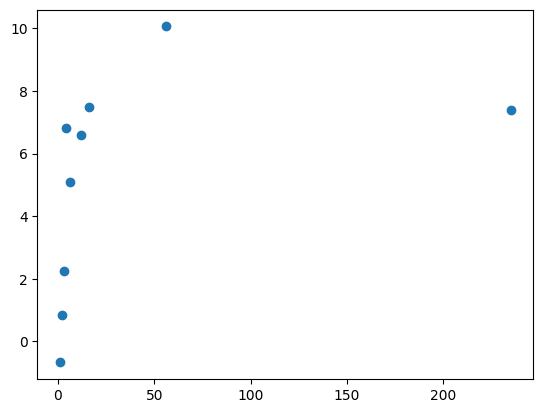

In [ ]:
plt.scatter(ms,bEs)

Text(0, 0.5, 'Binding Energy, MeV/A')

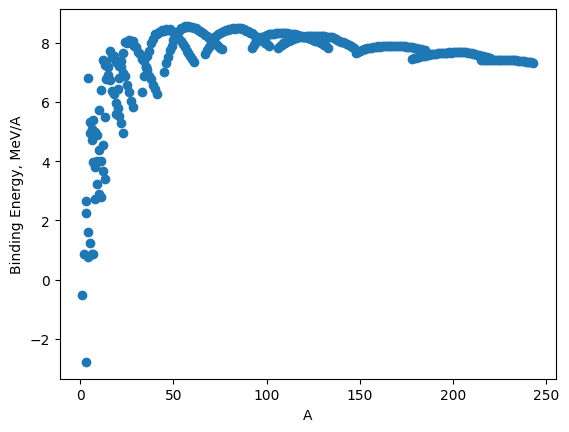

In [ ]:
elnames = ['H','He','Li','C','O','Mg','Ca','Fe','Kr','Ag','I','Yb','Pb','U']
bEalls = []
malls = []
for elname in elnames:
  elem = element(elname)
  isos = elem.isotopes
  for iso in isos:
    bE = binding_energy(iso.atomic_number,iso.mass_number,iso.mass)
    bEalls.append(bE/JtoeV/(1e6)/iso.mass_number)
    malls.append(iso.mass_number)
plt.scatter(malls,bEalls)
plt.xlabel('A')
plt.ylabel('Binding Energy, MeV/A')

The amount of energy generated by the proton-proton cycle depends on the temperature of the stellar interior. For fusion to occur, two protons have to get close enough to one another to overcome Columbic repulsion.  Using classical mechanics, the energy of an ideal gas can be computed as,
$U_{\textrm{thermal}} =\frac{3}{2} k T$, and setting that equal to the Coulomb energy, we have,
$
\frac{3}{2} k T = \frac{1}{4\pi \epsilon_0 }\frac{Z_1 Z_2 e^2}{r}.
$
Using $r \approx 10^{-15}$m results in an estimate of around $10^{10}$ K for a collision between two protons to be possible.

But the central temperature of the Sun is only $1.57\times 10^7$ K!

How is nuclear fusion occurring?

We will talk about this a little more next week.  Nuclear fusion *is* temperature dependent but it can in fact occur at temperatures that are attainable in the Sun's core (evidently!)

Let's see what the temperature dependence looks like phenomenologically:



In [ ]:
def nuclear_PP(T, rho, X, Z):
    """
    Nuclear computes the nuclear energy generation rate for the proton-proton
    chain

    Parameters
    ----------
    T : float
        temperature.
    rho : float
        density.
    X : float
        mass fraction hydrogen.
    Z : float
        mass fraction metals.

    Returns
    -------
    eps : float
        total energy generation rate from PP chain

    """
    fpp = 1
    A_pp = 0.241

    T6 = T*1.0e-06
    T8 = T*1.0e-08

    #PP chains (see Hansen and Kawaler, Eq. 6.65, 6.73, and 6.74)
    psipp = 1 + 1.412e8*(1/X - 1)*np.exp(-49.98*(T6)**(-1/3.))
    Cpp = 1 + 0.0123*(T6)**(1/3.) + 0.0109*(T6)**(2/3.) + 0.000938*T6
    eps_pp = A_pp*rho*X*X*fpp*psipp*Cpp*(T6**(-2/3.))*np.exp(-33.80
                                            *(T6**(-1/3.))) #Eq. (10.46)




    return eps_pp

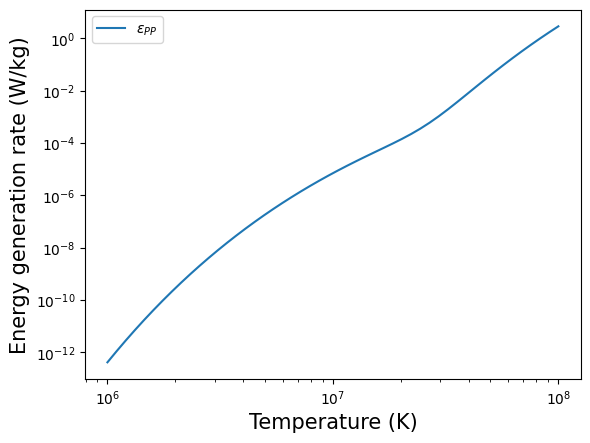

In [ ]:
Ts = np.logspace(6,8,50)

rho = 1000
X = 0.9
Z = 0.05
epsilons = np.array([nuclear_PP(T,rho,X,Z) for T in Ts])

fig,ax = plt.subplots()

ax.loglog(Ts,epsilons)
ax.set_xlabel('Temperature (K)',fontsize=15)
ax.set_ylabel('Energy generation rate (W/kg)',fontsize=15)
plt.legend(['$\epsilon_{PP}$'])